Group#06

Group Memebers:
1. Ahamd Jawed Seddiqi
2. Muhammaddin Mominzai (03778571)
3. Nawidullah Sultani
4. Sai Avinash Thota

In this project, you will develop models to predict traffic flow in California, US. Such insights can help optimize traffic management, reduce congestion, and improve navigation systems for example. The task is divided into two parts:

1. **Decision Trees:** Predict traffic flow over the next hour as a categorical variable (low, average, high).
2. **Neural Networks:** Regression model to predict the exact traffic flow (over the next hour) as a continuous variable.

But before starting with that, you need to preprocess the data and perform some eda, which is the main goal of this notebook.

# Second Programming Assignment

# Traffic Flow Analysis - Part 1 (Data)

---

Group Number:

Members:

1.
2.
3.
4.

In [18]:
# Necessary imports

import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## 1. Data Preprocessing

The traffic data for this project comes from the [Caltrans Performance Measurement System (PeMS)](https://pems.dot.ca.gov/). To be specific, we will use the data from District 3 (Sacramento and Marysville areas), collected over a duration of three months (September to November 2018). This is commonly refered to as the **PEMS03** dataset in literature.

While there are many Stations in the area, we'll focus on a set of 358 stations which are listed in the file `Station_IDs.txt`.

In [19]:
stn_ids = list()

############################################
#####   TODO - YOUR CODE STARTS HERE   #####

# Load the 358 stations in stn_ids and sort them
stn_ids = pd.read_csv('Station_IDs.txt', header=None, names=['Station_ID'])      # Assuming no header, naming the column
stn_ids = stn_ids.sort_values(by='Station_ID')                                   # Sort by the 'Station_ID' column
stn_ids = stn_ids['Station_ID'].tolist()                                         # Extract the sorted IDs as a list

# Print the station IDs for verification
print(stn_ids)


######   TODO - YOUR CODE ENDS HERE   ######
############################################

[311903, 311930, 312010, 312098, 312103, 312132, 312133, 312134, 312139, 312188, 312220, 312233, 312236, 312264, 312326, 312343, 312346, 312382, 312386, 312388, 312420, 312421, 312422, 312425, 312439, 312513, 312514, 312517, 312520, 312523, 312525, 312527, 312530, 312562, 312564, 312566, 312570, 312648, 312651, 312689, 312694, 312745, 312757, 312771, 312782, 312804, 312807, 312852, 312854, 312856, 312857, 312858, 312865, 312895, 312896, 312898, 312900, 312940, 312942, 312944, 312946, 313000, 313003, 313005, 313010, 313035, 313037, 313055, 313080, 313082, 313111, 313114, 313132, 313144, 313159, 313166, 313172, 313178, 313184, 313190, 313197, 313204, 313339, 313344, 313349, 313438, 313450, 313487, 313493, 313512, 313551, 313552, 313658, 313772, 313846, 313852, 313951, 313956, 313979, 314013, 314025, 314036, 314042, 314121, 314147, 314157, 314165, 314217, 314230, 314241, 314248, 314371, 314379, 314419, 314433, 314446, 314460, 314485, 314491, 314501, 314548, 314559, 314598, 314617, 314625,

In [20]:
# Mapping of station IDs to indices (0-357), for easy access
# Use this in subsequent tasks

stn_mapping = dict()

# Mapping of station IDs to indices (0-357), for easy access
# Use this in subsequent tasks

stn_mapping = {stnid: i+1 for i, stnid in enumerate(stn_ids)}
print(stn_mapping)


{311903: 1, 311930: 2, 312010: 3, 312098: 4, 312103: 5, 312132: 6, 312133: 7, 312134: 8, 312139: 9, 312188: 10, 312220: 11, 312233: 12, 312236: 13, 312264: 14, 312326: 15, 312343: 16, 312346: 17, 312382: 18, 312386: 19, 312388: 20, 312420: 21, 312421: 22, 312422: 23, 312425: 24, 312439: 25, 312513: 26, 312514: 27, 312517: 28, 312520: 29, 312523: 30, 312525: 31, 312527: 32, 312530: 33, 312562: 34, 312564: 35, 312566: 36, 312570: 37, 312648: 38, 312651: 39, 312689: 40, 312694: 41, 312745: 42, 312757: 43, 312771: 44, 312782: 45, 312804: 46, 312807: 47, 312852: 48, 312854: 49, 312856: 50, 312857: 51, 312858: 52, 312865: 53, 312895: 54, 312896: 55, 312898: 56, 312900: 57, 312940: 58, 312942: 59, 312944: 60, 312946: 61, 313000: 62, 313003: 63, 313005: 64, 313010: 65, 313035: 66, 313037: 67, 313055: 68, 313080: 69, 313082: 70, 313111: 71, 313114: 72, 313132: 73, 313144: 74, 313159: 75, 313166: 76, 313172: 77, 313178: 78, 313184: 79, 313190: 80, 313197: 81, 313204: 82, 313339: 83, 313344: 84, 

Next up, let's get some metadata for these stations. The file `Station_Metadata.txt` contains the following information (tab separated):

* **ID:** Unique identifier
* **Fwy:** Freeway number (e.g. 5, 10, 405)
* **Dir:** Freeway direction (N | S | E | W)
* **District:** District number
* **County:** County number
* **City:** City number
* **State_PM:** Position of detector station using the California postmile system.
* **Abs_PM:** Absolute position of detector station.
* **Latitude:** Estimated latitude of detector station.
* **Longitude:** Estimated longitude of detector station.
* **Length:** Length of detection.

* **Type:** Type of station. For example:

    * ML = Mainline
    * FR = Off-ramp
    * OR = On-ramp
    * HV = High Occupancy Vehicle
    * CD = Coll/Dist
    * FF = Freeway-to-Freeway

* **Lanes:** Number of lanes.
* **Name:**	Name of station.
* **User_ID_[1-4]:** User defined strings.

**Note:** The file also contains metadata for stations that we don't consider. Also, take care of data types while loading the data.

In [21]:
stn_metadata = dict()

############################################
#####   TODO - YOUR CODE STARTS HERE   #####

# Load the metadata for the 358 stations
metadata = pd.read_csv('Station_Metadata.txt', sep='\t')                          # Read the metadata from the tab-separated file

# Insert them as (key, metadata) pairs in stn_metadata dictionary
# Convert the DataFrame into a nested dictionary with ID as the outer key
# Key is from 0-357: Use stn_mapping
# Metadata should also be a dictionary with keys: ID, Fwy, Dir ... (You can skip information that you think is not important)
for key, value in stn_mapping.items():                                            # Iterate over station IDs in stn_mapping
    # Extract the row corresponding to the station
    row = metadata[metadata["ID"] == key].to_dict(orient="records")[0]            # Assuming "ID" is the column name for station IDs
    stn_metadata[value] = row  # Use the station index as key and row as value

# Print the nested dictionary
for key, value in stn_metadata.items():
    print(f"{key}: {value}")

######   TODO - YOUR CODE ENDS HERE   ######
############################################

1: {'ID': 311903, 'Fwy': 50, 'Dir': 'E', 'District': 3, 'County': 67, 'City': 64000.0, 'State_PM': 'L.624', 'Abs_PM': 3.78, 'Latitude': 38.566948, 'Longitude': -121.506049, 'Length': 0.943, 'Type': 'ML', 'Lanes': 3, 'Name': '6th St.', 'User_ID_1': 'TA-101', 'User_ID_2': nan, 'User_ID_3': nan, 'User_ID_4': nan}
2: {'ID': 311930, 'Fwy': 50, 'Dir': 'E', 'District': 3, 'County': 67, 'City': 64000.0, 'State_PM': 'L.764', 'Abs_PM': 3.92, 'Latitude': 38.566287, 'Longitude': -121.503555, 'Length': nan, 'Type': 'FF', 'Lanes': 3, 'Name': 'FF 5N/SB -> 50EB', 'User_ID_1': 'TA-101', 'User_ID_2': nan, 'User_ID_3': nan, 'User_ID_4': nan}
3: {'ID': 312010, 'Fwy': 50, 'Dir': 'W', 'District': 3, 'County': 67, 'City': 64000.0, 'State_PM': 'L1.351', 'Abs_PM': 4.507, 'Latitude': 38.563789, 'Longitude': -121.493211, 'Length': 0.471, 'Type': 'ML', 'Lanes': 5, 'Name': '15th St', 'User_ID_1': 'TA-103', 'User_ID_2': nan, 'User_ID_3': nan, 'User_ID_4': nan}
4: {'ID': 312098, 'Fwy': 50, 'Dir': 'E', 'District': 3,

Moving on, we have geographical knowledge in form of a graph, with the stations as nodes. The file `Connections.csv` contains the edges. Entries in the adjacency matrix should be 0 or 1, depending on whether there is a connection between two stations or not. The distance matrix should contain the distance between stations. (∞ if no connection, 0 in diagonal)

**Note:** Both matrices should be symmetric, as the graph is undirected.

In [29]:
# 1. Create numpy arrays named adj_matrix and dist_matrix of shape (358, 358)

adj_matrix = np.zeros((358, 358), dtype=int)
dist_matrix = np.full((358,358), np.inf, dtype=np.float32)

dist_matrix[range(358), range(358)] = 0

############################################
#####   TODO - YOUR CODE STARTS HERE   #####

# 2. Load the edge connections from the file 'Data/Connections.csv'
connections = pd.read_csv("Connections.csv")

# 3. Then populate the matrices. Use stn_mapping to map station IDs to indices
for index, row in connections.iterrows():
  id_from = row['from'] # Access 'from' column
  id_to = row['to'] # Access 'to' column
  distance = row['distance'] # Access 'distance' column

  # Use stn_mapping to get the indices for id_from and id_to
  index_from = stn_mapping[id_from]-1
  index_to = stn_mapping[id_to]-1

  # Update adj_matrix and dist_matrix
  adj_matrix[index_from, index_to] = 1
  dist_matrix[index_from, index_to] = distance

  # Since the graph is undirected, update the reverse connection as well
  adj_matrix[index_to, index_from] = 1
  dist_matrix[index_to, index_from] = distance
print(pd.DataFrame(dist_matrix))
print(pd.DataFrame(adj_matrix))


######   TODO - YOUR CODE ENDS HERE   ######
############################################

     0    1      2    3      4    5    6    7      8    9    ...    348  \
0    0.0  inf    inf  inf    inf  inf  inf  inf  0.295  inf  ...    inf   
1    inf  0.0    inf  inf    inf  inf  inf  inf  0.295  inf  ...    inf   
2    inf  inf  0.000  inf  2.757  inf  inf  inf    inf  inf  ...    inf   
3    inf  inf    inf  0.0    inf  inf  inf  inf    inf  inf  ...    inf   
4    inf  inf  2.757  inf  0.000  inf  inf  inf    inf  inf  ...    inf   
..   ...  ...    ...  ...    ...  ...  ...  ...    ...  ...  ...    ...   
353  inf  inf    inf  inf    inf  inf  inf  inf    inf  inf  ...    inf   
354  inf  inf    inf  inf    inf  inf  inf  inf    inf  inf  ...  0.707   
355  inf  inf    inf  inf    inf  inf  inf  inf    inf  inf  ...  0.707   
356  inf  inf    inf  inf    inf  inf  inf  inf    inf  inf  ...    inf   
357  inf  inf    inf  inf    inf  inf  inf  inf    inf  inf  ...    inf   

       349  350  351   352   353  354  355   356   357  
0      inf  inf  inf   inf   inf  inf  inf

Finally, the temporal data is stored in the file `PEMS03.txt`. There is a datapoint for each station every 1 hour. So we need to extract 24 hours * 91 days = 2184 readings for each station. Again, there's a lot of data in this file, but we only consider the following 3 important variables:

* **Flow:** Vehicle flow over the hour. (This is the target variable y)
* **Occupancy:** Station occupancy over the hour expressed as a decimal number between 0 and 1.
* **Avgerage Speed:** Of the passing vehicles.

Each line in the file is comma separated, with the 3 needed variables being the **10th**, **11th**, and **12th** columns respectively. The **2nd** column is the station ID, which you can use for mapping (same as in previous tasks).

**Note:** There are some missing values (empty string `''`), handle them appropriately. For example, you can fill them with the mean of the column. Also, convert all three to float.

In [23]:
############################################
#####   TODO - YOUR CODE STARTS HERE   #####

# Create numpy array named x_time of shape (2184, 358, 3)
#x_time = np.zeros((2184, 358, 3))
#print(x_time)

PEMS = pd.read_csv("Stn_Filt_PEMS03.txt", header=None)

datetime_unique = np.unique(PEMS[0])
datetime_unique = pd.DataFrame(datetime_unique)
datetime_unique = datetime_unique.sort_values(by = [0])
datetime_unique = datetime_unique[0].tolist()
datetime_mapping = {dt: i+1 for i, dt in enumerate(datetime_unique)}

print(datetime_mapping)

{'09/01/2018 00:00:00': 1, '09/01/2018 01:00:00': 2, '09/01/2018 02:00:00': 3, '09/01/2018 03:00:00': 4, '09/01/2018 04:00:00': 5, '09/01/2018 05:00:00': 6, '09/01/2018 06:00:00': 7, '09/01/2018 07:00:00': 8, '09/01/2018 08:00:00': 9, '09/01/2018 09:00:00': 10, '09/01/2018 10:00:00': 11, '09/01/2018 11:00:00': 12, '09/01/2018 12:00:00': 13, '09/01/2018 13:00:00': 14, '09/01/2018 14:00:00': 15, '09/01/2018 15:00:00': 16, '09/01/2018 16:00:00': 17, '09/01/2018 17:00:00': 18, '09/01/2018 18:00:00': 19, '09/01/2018 19:00:00': 20, '09/01/2018 20:00:00': 21, '09/01/2018 21:00:00': 22, '09/01/2018 22:00:00': 23, '09/01/2018 23:00:00': 24, '09/02/2018 00:00:00': 25, '09/02/2018 01:00:00': 26, '09/02/2018 02:00:00': 27, '09/02/2018 03:00:00': 28, '09/02/2018 04:00:00': 29, '09/02/2018 05:00:00': 30, '09/02/2018 06:00:00': 31, '09/02/2018 07:00:00': 32, '09/02/2018 08:00:00': 33, '09/02/2018 09:00:00': 34, '09/02/2018 10:00:00': 35, '09/02/2018 11:00:00': 36, '09/02/2018 12:00:00': 37, '09/02/20

In [24]:

p = PEMS.to_numpy()
x_time = np.zeros((2184, 358, 3))

# Step 3: Iterate through the DataFrame and populate the zeros array
# x_time[t, i] should contain [flow, occupancy, avg. speed] at station i at time t
# You know by now how to map station IDs to indices :-)

for _, row in PEMS.iterrows():
    indT = datetime_mapping[row[0]] - 1  # Convert indT from string to integer
    indS = stn_mapping[row[1]] -1  # Convert indS to integer if needed
    value1 = float(row[2])  # Assuming this is a valid number
    value2 = float(row[3])  # Column 3
    value3 = float(row[4])  # Column 4
    # Assuming you want to populate zeros_array row-wise
    x_time[indT, indS] = [value1, value2, value3]

# Output the final array
print(x_time)

######   TODO - YOUR CODE ENDS HERE   ######
############################################

[[[8.860e+02 1.600e-02 6.650e+01]
  [1.590e+02 2.600e-03 6.271e+01]
  [1.490e+03 2.020e-02 6.880e+01]
  ...
  [1.557e+03 2.420e-02 6.780e+01]
  [2.230e+02 1.450e-02 6.430e+01]
  [1.333e+03 2.090e-02 6.910e+01]]

 [[6.810e+02 1.230e-02 6.600e+01]
  [1.620e+02 2.000e-03 6.271e+01]
  [1.129e+03 1.530e-02 6.840e+01]
  ...
  [9.150e+02 1.750e-02 6.700e+01]
  [1.300e+02 9.900e-03 6.410e+01]
  [8.420e+02 1.560e-02 6.690e+01]]

 [[4.890e+02 9.800e-03 6.570e+01]
  [1.590e+02 2.000e-03 6.271e+01]
  [8.960e+02 1.200e-02 6.870e+01]
  ...
  [8.970e+02 1.690e-02 6.710e+01]
  [9.500e+01 6.400e-03 6.490e+01]
  [5.800e+02 1.120e-02 6.730e+01]]

 ...

 [[2.370e+03 4.240e-02 6.550e+01]
  [9.420e+02 1.280e-02 6.271e+01]
  [4.250e+03 5.340e-02 6.740e+01]
  ...
  [3.085e+03 5.350e-02 6.750e+01]
  [5.360e+02 2.750e-02 6.510e+01]
  [2.907e+03 4.860e-02 6.730e+01]]

 [[2.223e+03 3.940e-02 6.480e+01]
  [7.610e+02 1.020e-02 6.271e+01]
  [3.428e+03 4.300e-02 6.710e+01]
  ...
  [2.266e+03 3.980e-02 6.850e+01]
  [3

Great job! Good to go now. As a sanity check, you can run the following cell and see some samples. We then save the results to be used in the next part.

In [25]:
# Let's print some samples

src = 11
dst = 166
time = 130

print(f'On September 6th, from 9 to 10 AM, at Station {src}:')
flow = x_time[time, src, 0]
avg_occupancy = x_time[time, src, 1]
avg_speed = x_time[time, src, 2]
print(f'- Flow: {int(flow)} vehicles')
print(f'- Average Occupancy: {avg_occupancy:.5f}')
print(f'- Average Speed: {avg_speed:.2f} mph\n')
print(f'Station {src} Metadata:', stn_metadata[src], '\n')
print(f'Connection between Station {src} and {dst}: {adj_matrix[src, dst]}')
print(f'Distance between Station {src} and {dst}: {dist_matrix[src, dst]}')

On September 6th, from 9 to 10 AM, at Station 11:
- Flow: 2890 vehicles
- Average Occupancy: 0.05920
- Average Speed: 60.90 mph

Station 11 Metadata: {'ID': 312220, 'Fwy': 50, 'Dir': 'W', 'District': 3, 'County': 67, 'City': 64000.0, 'State_PM': 'R3.8', 'Abs_PM': 9.434, 'Latitude': 38.55435, 'Longitude': -121.407106, 'Length': 0.636, 'Type': 'ML', 'Lanes': 4, 'Name': 'NB Howe Ave', 'User_ID_1': 'TA-117', 'User_ID_2': nan, 'User_ID_3': nan, 'User_ID_4': nan} 

Connection between Station 11 and 166: 1
Distance between Station 11 and 166: 0.628000020980835


In [26]:
# Save the preprocessed data in the same directory as the Jupyter notebook
np.savez('PEMS03.npz', x=x_time)
np.savez('Graph.npz', adj=adj_matrix, dist=dist_matrix)
with open('Station_Metadata.json', 'w') as json_file:
    json.dump(stn_metadata, json_file, indent=4)


In [28]:
from google.colab import files

# Download specific files
files.download('PEMS03.npz')
files.download('Graph.npz')
files.download('Station_Metadata.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2. Exploratory Data Analysis (EDA)

Additionaly, it's always good to play around with the data and understand it better. You can plot how the flow changes over time, can check the distribution of the flow and speed, or any variables from the metadata. Maybe find some weekly patterns. Feel free to explore on your own, this will help craft effective features in the next part.

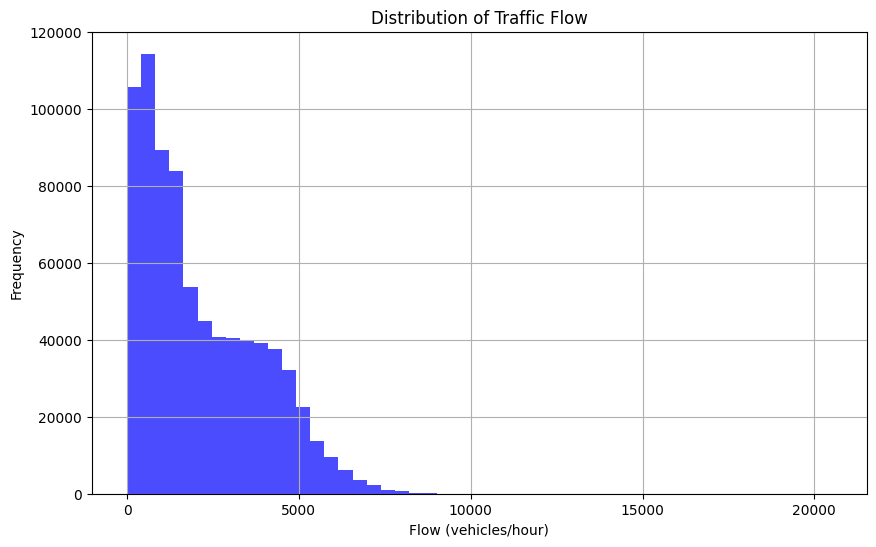

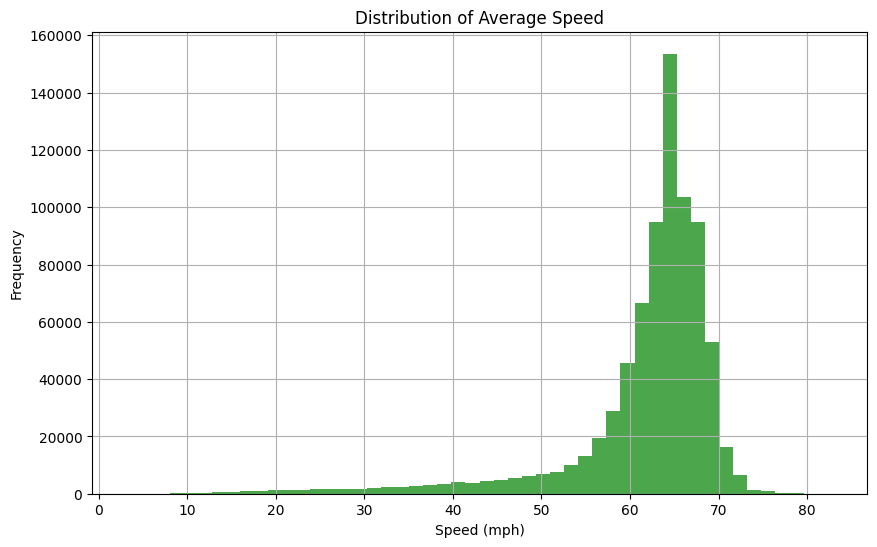

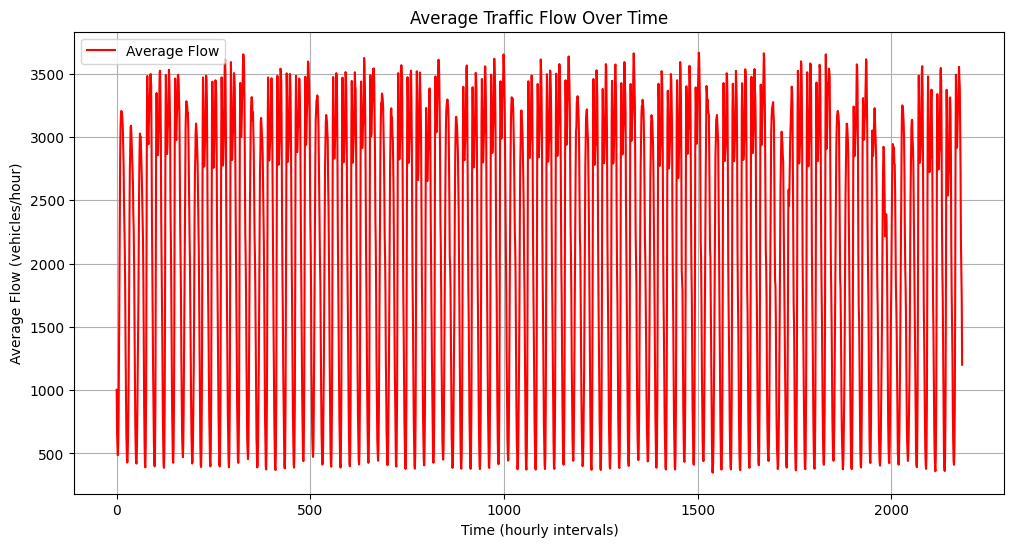

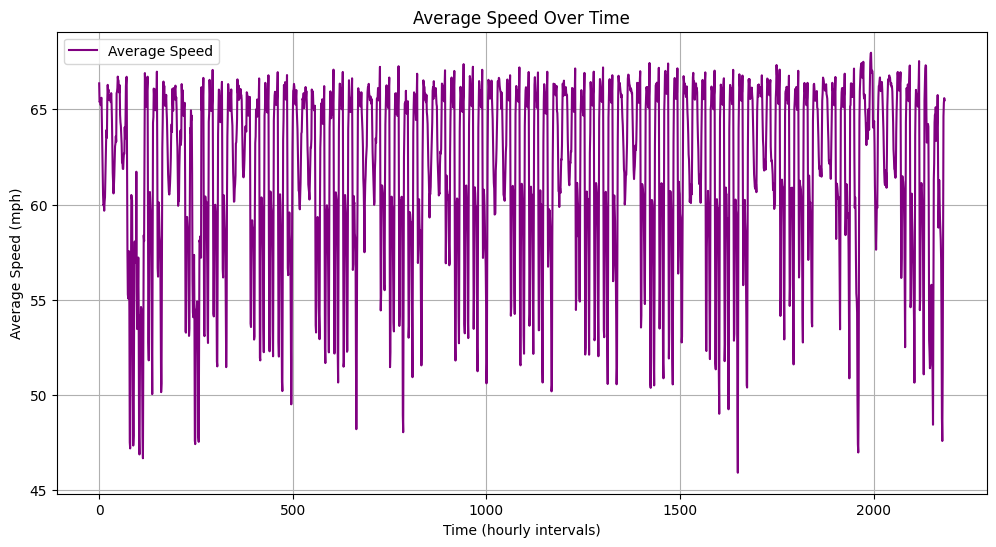

In [30]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed data
data = np.load('PEMS03.npz')
x_time = data['x']

# Sample analysis: Flow distribution
plt.figure(figsize=(10, 6))
plt.hist(x_time[:, :, 0].flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Traffic Flow')
plt.xlabel('Flow (vehicles/hour)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('flow_distribution.png')
plt.show()

# Sample analysis: Speed distribution
plt.figure(figsize=(10, 6))
plt.hist(x_time[:, :, 2].flatten(), bins=50, color='green', alpha=0.7)
plt.title('Distribution of Average Speed')
plt.xlabel('Speed (mph)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('speed_distribution.png')
plt.show()

# Temporal pattern: Average flow across time
average_flow = np.mean(x_time[:, :, 0], axis=1)
plt.figure(figsize=(12, 6))
plt.plot(range(len(average_flow)), average_flow, label='Average Flow', color='red')
plt.title('Average Traffic Flow Over Time')
plt.xlabel('Time (hourly intervals)')
plt.ylabel('Average Flow (vehicles/hour)')
plt.legend()
plt.grid(True)
plt.savefig('average_flow_over_time.png')
plt.show()

# Temporal pattern: Average speed across time
average_speed = np.mean(x_time[:, :, 2], axis=1)
plt.figure(figsize=(12, 6))
plt.plot(range(len(average_speed)), average_speed, label='Average Speed', color='purple')
plt.title('Average Speed Over Time')
plt.xlabel('Time (hourly intervals)')
plt.ylabel('Average Speed (mph)')
plt.legend()
plt.grid(True)
plt.savefig('average_speed_over_time.png')
plt.show()


In [32]:

# Download the image files
files.download('flow_distribution.png')
files.download('speed_distribution.png')
files.download('average_flow_over_time.png')
files.download('average_speed_over_time.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>